## 配合課程影片 hmwu_StatR-02.2
### Exercise 2-2

In [0]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## 二項式分佈

In [0]:
# X ~ B(10, 0.8)
binomial_rvs = stats.binom.rvs(10, 0.8, size = 100)
pd.Series(binomial_rvs).value_counts()

8     36
9     21
7     19
10    14
6      7
5      2
4      1
dtype: int64

In [0]:
# 抽樣結果binomial_rvs的平均值與變異數：
print("Mean(binomial_rvs):", binomial_rvs.mean())
print("Var(binomial_rvs):", binomial_rvs.var())

# 理論上二項式分佈的平均值mu，變異數sigma2：
# mu = n*p
# sigma2 = n*p*(1-p)

Mean(binomial_rvs): 8.06
Var(binomial_rvs): 1.5764000000000002


## 常態分佈

In [0]:
# X ~ N(0, 1)
print("pdf f(0):", stats.norm.pdf(0, loc = 0, scale = 1))
print("cdf P(X <= -1):", stats.norm.cdf(-1, loc = 0, scale = 1))
print("x分位點:", stats.norm.ppf(0.975, loc = 0, scale = 1))
print("X ~ N(10,4):", stats.norm.rvs(loc = 10, scale = 2, size = 5))
print("P(8 <= X <= 15), X ~ N(10, 4):", stats.norm.cdf(15, loc = 10, scale = 2) - stats.norm.cdf(8, loc = 10, scale = 2))

pdf f(0): 0.3989422804014327
cdf P(X <= -1): 0.15865525393145707
x分位點: 1.959963984540054
X ~ N(10,4): [ 8.26529988  8.94473023 11.05329768  9.96436753 11.31405406]
P(8 <= X <= 15), X ~ N(10, 4): 0.8351350807427668


/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


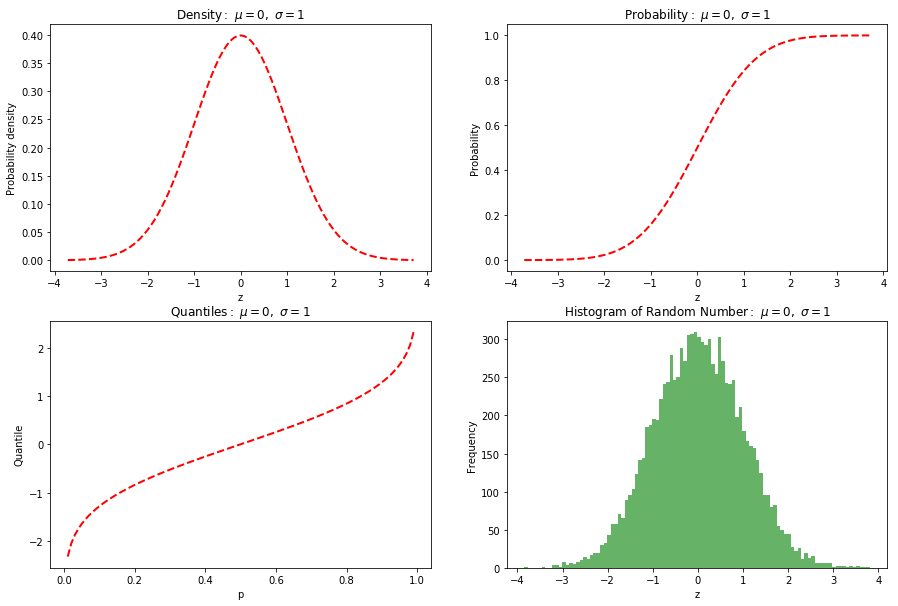

In [0]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Subplot(0,0):
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 101)
y = stats.norm.pdf(x, loc = 0, scale = 1)
axes[0, 0].plot(x, y, 'r--', linewidth = 2)

axes[0, 0].set_xlabel('z')
axes[0, 0].set_ylabel('Probability density')
axes[0, 0].set_title(r'$\mathrm{Density:}\ \mu = 0,\ \sigma = 1$')


# Subplot(0,1):
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 101)
y = stats.norm.cdf(x, loc = 0, scale = 1)
axes[0, 1].plot(x, y, 'r--', linewidth = 2)

axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].set_title(r'$\mathrm{Probability:}\ \mu = 0,\ \sigma = 1$')


# Subplot(1,0):
x = np.linspace(0, 1, 101)
y = stats.norm.ppf(x, loc = 0, scale = 1)
axes[1, 0].plot(x, y, 'r--', linewidth = 2)

axes[1, 0].set_xlabel('p')
axes[1, 0].set_ylabel('Quantile')
axes[1, 0].set_title(r'$\mathrm{Quantiles:}\ \mu = 0,\ \sigma = 1$')


# Subplot(1,1):
norm_rvs = stats.norm.rvs(loc = 0, scale = 1, size = 10000)
axes[1, 1].hist(norm_rvs, 100, normed = False, facecolor = 'green', alpha = 0.6)

axes[1, 1].set_xlabel('z')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(r'$\mathrm{Histogram\ of\ Random\ Number:}\ \mu = 0,\ \sigma = 1$')


plt.show()

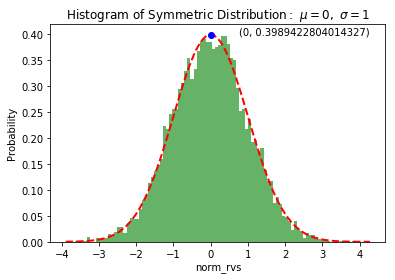

In [0]:
# 請以直方圖（histogram）觀察10000個標準常態分佈的隨機數結果：
norm_rvs = stats.norm.rvs(loc = 0, scale = 1, size = 10000)
n, bins, patches = plt.hist(norm_rvs, 100, normed = True, facecolor = 'green', alpha = 0.6)

x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 101)
y = stats.norm.pdf(bins, loc = 0, scale = 1)
l = plt.plot(bins, y, 'r--', linewidth = 2)

# 標出標準常態分佈的頂點座標
peak = plt.plot(0, stats.norm.pdf(0, loc = 0, scale = 1), 'bo')
plt.text(0.75, 0.4, '(0, '+ str(stats.norm.pdf(0, loc = 0, scale = 1))+')')

plt.xlabel('norm_rvs')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Symmetric\ Distribution:}\ \mu = 0,\ \sigma = 1$')
plt.show()

## 以常態分佈逼近二項式分佈

In [0]:
n, p = 20, 0.4
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

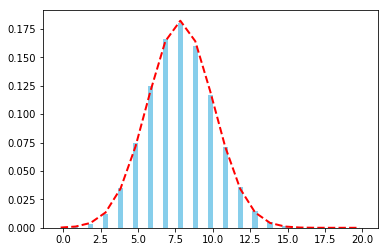

In [0]:
x = np.arange(0, 21, 1) # the x locations for the groups
width = 0.35  # the width of the bars

rects1 = plt.bar(x - width/2, stats.binom.pmf(x, 20, 0.4), width, color = 'SkyBlue', label = 'PMF of B(20, 0.4)')

z = np.arange(0, 21)
y = stats.norm.pdf(z, loc = mu, scale = sigma)
l = plt.plot(x, y, 'r--', linewidth = 2)